<a href="https://colab.research.google.com/github/sgirabin/nyp-iti102-assignment/blob/main/%5BITI102%5DPart_2_4466624P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trend Analysis for Grocery Store Key&U


| Name | Student ID | Input File |
|------|------------|------------|
| Isak Rabin | 4466624P |  4466624P_sales.csv |


## Background

Grocery store Key&U is a mini-mart that has been open since 2000. The store owner has recently digitised its data. The store owner wishes to use the data collected from the past years to have a deeper insight into the business and, hopefully, will be able to use machine learning to perform predictions.

During the interview with the store owner, he wanted to be able to
* View any common trends for each month throughout the year
* View any common trends for each year


## Objective

We aim to analyze transaction trends by month and year and identify top-selling items over time. This analysis will support  plan promotions, staffing, and inventory.

We will perform:
- Data Cleaning and Validation
- Data Exploration which include Descriptive Analysis with Visualizations

## Implementation

### Pre-requisite

For this assignment, we are going to use assigned dataset, which can be donwloaded from the following google drive:
https://drive.google.com/file/d/1dvrvIcmpXrNk7ah_U6Y4tt78HCI_zGTm/view?usp=drive_link

The file contains the observations of historical sale.

In [1]:
# download data.csv from google drive
!wget "https://drive.usercontent.google.com/download?id=1DXadGavnfs56AGB8cd25h4luq1NcqIcG&export=download&authuser=0&confirm=t&uuid=eef3517c-29e4-417a-b701-ba5a581b803d&at=ALoNOgkW2QjovD5DOm23UZ44vzwi:1749349835971" -O 4466624P_sales.csv

# check file content to confirm file downloaded successfully
!head  4466624P_sales.csv

--2025-06-08 15:14:12--  https://drive.usercontent.google.com/download?id=1DXadGavnfs56AGB8cd25h4luq1NcqIcG&export=download&authuser=0&confirm=t&uuid=eef3517c-29e4-417a-b701-ba5a581b803d&at=ALoNOgkW2QjovD5DOm23UZ44vzwi:1749349835971
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200402924 (191M) [application/octet-stream]
Saving to: ‘4466624P_sales.csv’

4466624P_sales.csv  100%[===================>] 191.12M   146MB/s    in 1.3s    

2025-06-08 15:14:15 (146 MB/s) - ‘4466624P_sales.csv’ saved [200402924/200402924]

,transaction id,item id,discounted ,discounted %,time of purchase
0,fbfd877b-109b-4477-af5c-267847a7251f,,No,0.0,
1,fbfd877b-109b-4477-af5c-267847a7251f,2ED8,No,0.0,"01/01/2000, 13:33:57"
2,fbfd877b-109b-4477-af5c-267847a7251f,6A06,No,0.0,"01/01/2000,

### Step 1: Import Libraries and Load Dataset

First, we need to import necessary library for our data processing and visualisation.

We’ll use NumPy and Pandas for data processing, and use Seaborn, a library built on Matplotlib that makes it easy to create informative and attractive statistical plots.

 Visualization helps reveal trends and patterns, even for non-programmers.

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, We will load the data that downloaded earlier, and display the first few rows by using `head() `function.

`head()` function by default return the first 5 rows of dataset.

In [3]:
# Load and Inspect Data
file_path = "4466624P_sales.csv"
sales_data = pd.read_csv(file_path)

In [4]:
# Display first few rows
sales_data.head()

,Unnamed: 0,transaction id,item id,discounted,discounted %,time of purchase
0,0,fbfd877b-109b-4477-af5c-267847a7251f,NaN,No,0.0,NaN
1,1,fbfd877b-109b-4477-af5c-267847a7251f,2ED8,No,0.0,"01/01/2000, 13:33:57"
2,2,fbfd877b-109b-4477-af5c-267847a7251f,6A06,No,0.0,"01/01/2000, 13:33:25"
3,3,fbfd877b-109b-4477-af5c-267847a7251f,28FC,No,0.0,"01/01/2000, 13:33:04"
4,4,fbfd877b-109b-4477-af5c-267847a7251f,8700,No,0.0,"01/01/2000, 13:33:46"


We also want to understand the definition of each column from our dataset. We will use `info()` function for this purpose.

In [5]:
# Print Schema
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633416 entries, 0 to 2633415
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   transaction id    object 
 2   item id           object 
 3   discounted        object 
 4   discounted %      float64
 5   time of purchase  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 120.5+ MB


Lastly, we want to know how many records available in our dataset. For this, we are going to use `shape[0]` function which will return number of records in our dataset.

In [6]:
# Count of total records
sales_data.shape[0]

2633416

And how many unique (`transaction id`, `item_id`) from those records that we have.

In [7]:
print(sales_data.nunique())

Unnamed: 0          2633416
transaction id       526892
item id                  52
discounted                2
discounted %             71
time of purchase    2121088
dtype: int64


### Step 2: Data Cleaning

We have some pre-eliminary understanding of our dataset. As for next step, we would like to perform some data cleaning so that we can remove unnecessary data from our dataset that may impact our data analysis later on.

The following data cleaning will be performed
- Remove unnecessary column
  We do not need all column, especially the row index.

- Standardize all column name and value
  It is important that to ensure our dataset is accurate, consistent, and usable.
  To achieve that, the following process will be applied
  - make all value case in-sensitive (lower case)
  - remove row with missing value or `null` in our dataset
  - remove duplicate records

- Conduct data validation to ensure that all the value in our dataset are correct.
  -- We will check `discount %` and also `time of purchase`

#### Step 2.1: Remove unnecessary column for analysis

First column from our dataset is just a row index or sequence number. We can remove this, since we will not use for analysis.

Removing this column will also help to find duplicate records in later step.

In [8]:
# Drop the first column - This is just a row index or sequence number, no use for this. It will help to find duplicate records in later step.
if "Unnamed: 0" in sales_data.columns:
    sales_data = sales_data.drop(columns=["Unnamed: 0"])

In [9]:
# confirm if first column is dropped
sales_data.head()

,transaction id,item id,discounted,discounted %,time of purchase
0,fbfd877b-109b-4477-af5c-267847a7251f,NaN,No,0.0,NaN
1,fbfd877b-109b-4477-af5c-267847a7251f,2ED8,No,0.0,"01/01/2000, 13:33:57"
2,fbfd877b-109b-4477-af5c-267847a7251f,6A06,No,0.0,"01/01/2000, 13:33:25"
3,fbfd877b-109b-4477-af5c-267847a7251f,28FC,No,0.0,"01/01/2000, 13:33:04"
4,fbfd877b-109b-4477-af5c-267847a7251f,8700,No,0.0,"01/01/2000, 13:33:46"


We have sucessfully remove the row index column - `Unnamed: 0`

#### Step 2.2: Standardize all column name and value

 We want to ensure our dataset is accurate, consistent, and usable.
 To achieve that, we will perform the following
 - standardize the column names and values, such as converting them to lowercase and removing leading/trailing whitespaces.  
 - removing records with missing value or null
 - remove duplicate records

##### Step 2.2.1: Standardize the column names and values

First, we want to remove any trailing spaces in column name and its value.

This ensures:
- All column names and values are clean and standardized
- Avoids issues like "Yes", " yes ", and "YES" being treated as different categories

In [10]:
# Convert column names to lowercase and strip whitespace
sales_data.columns = sales_data.columns.str.lower().str.strip()

# Apply lowercase and strip whitespace for string columns
for col in sales_data.select_dtypes(include="object").columns:
    sales_data[col] = sales_data[col].str.lower().str.strip()

Lets confirmed whether value for `discounted` column only contains `no` and `yes`.

In [11]:
# Check unique values in 'discounted'
print(sales_data["discounted"].unique())

['no' 'yes']


Now, we wamt to visualize how many transactions were discounted. This helps us understand how often promotions were applied.

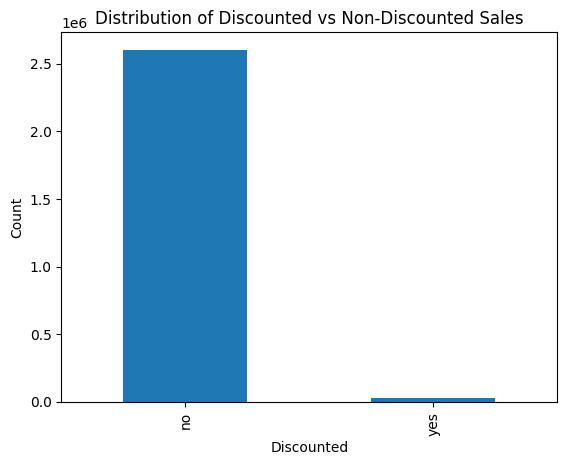

In [12]:
sales_data["discounted"].value_counts().plot(kind="bar")
plt.title("Distribution of Discounted vs Non-Discounted Sales")
plt.ylabel("Count")
plt.xlabel("Discounted")
plt.show()

Based on above graph, although `discounted %` is present, the vast majority of values are 0. This suggests that most transactions occurred without discount.

This could indicate consistent pricing, limited promotions, or missing data.

##### Step 2.2.2: Remove records will missing value

Next, we want to drop records with missing value because it can leads to wrong analysis.

In [13]:
# Check missing values
sales_data.isnull().sum()

,0
transaction id,0
item id,131670
discounted,0
discounted %,0
time of purchase,395012


We can observe there some missing value for `item id` and `time of purchase`.

Both `item id` and` time of purchase` are very crucial for sales analysis, especially for `time of purchase`, it is used for time based sales trend analysis, thus we will remove those records.

Lets visualise how mwny records are there that missing value.

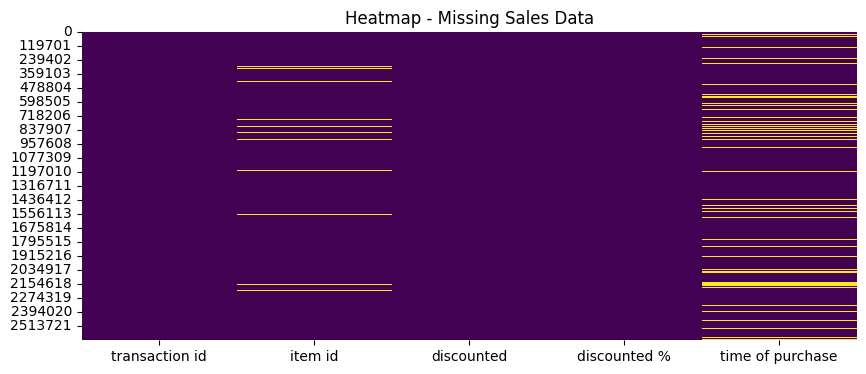

In [14]:
# Visualize Missing Data
plt.figure(figsize=(10, 4))
sns.heatmap(sales_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap - Missing Sales Data")
plt.show()

As shown on graph above, there is a quite number of records that is missing `time of purchase`.

In [15]:
# Drop rows where item id or time of purchase is missing
# 'item id' is crucial for sales analysis
# 'time of purchase' is crucial for time-based trends
sales_data = sales_data.dropna(subset=["item id", "time of purchase"])

In [16]:
# Confirm if there is still null value
sales_data.isnull().sum()

,0
transaction id,0
item id,0
discounted,0
discounted %,0
time of purchase,0


Now, we do not have records with missing value anymore.

##### Step 2.2.3: Remove duplicate records

In [17]:
# Check total number of duplicate records
duplicate_count = sales_data.duplicated().sum()
print(f"Number of duplicated records: {duplicate_count}")

Number of duplicated records: 1582


In [18]:
# confirm duplicate records
duplicate_rows = sales_data[sales_data.duplicated(keep=False)]
display(duplicate_rows)

,transaction id,item id,discounted,discounted %,time of purchase
2573,8b879518-9c2f-447f-b62b-33eeea78c08b,8700,no,0.0,"03/01/2000, 09:02:07"
2575,8b879518-9c2f-447f-b62b-33eeea78c08b,8700,no,0.0,"03/01/2000, 09:02:07"
3046,d2081634-90c8-4287-b5d4-97e2abafb2ae,316d,no,0.0,"03/01/2000, 13:19:04"
3047,d2081634-90c8-4287-b5d4-97e2abafb2ae,316d,no,0.0,"03/01/2000, 13:19:04"
3050,8cd5a5cb-b89e-410c-8592-28f81d707236,d4d3,no,0.0,"03/01/2000, 18:09:38"
...,...,...,...,...,...
2625719,d89e8cf1-b200-4be8-8a8b-11770996e1e0,82fc,no,0.0,"28/12/2009, 16:36:46"
2628206,9ee36fe8-a83b-4684-ae25-d1e42ff54360,1bc3,no,0.0,"30/12/2009, 13:09:19"
2628210,9ee36fe8-a83b-4684-ae25-d1e42ff54360,1bc3,no,0.0,"30/12/2009, 13:09:19"
2628594,c430bb1b-51e5-431c-91d7-8405b7bfde1c,1bc3,no,0.0,"30/12/2009, 09:01:38"


In [19]:
# drop duplicate
sales_data = sales_data.drop_duplicates()

In [20]:
# confirm no more duplicate records
duplicate_rows = sales_data[sales_data.duplicated(keep=False)]
display(duplicate_rows)

,transaction id,item id,discounted,discounted %,time of purchase


Now, we do not have duplicate records anymore.

Lets check the number of unique records now.

In [21]:
print(sales_data.nunique())

transaction id       512858
item id                  52
discounted                2
discounted %             71
time of purchase    2020481
dtype: int64


#### Step 2.3: Data Validation

This step is necessary to ensure we have a valid data to be analysed.

##### Step 2.3.1: Ensure the `discount %` value is correct

The `discount %` should be numeric, and it should greater than 0 and less than 100

In [22]:
# Describe numeric range
print(sales_data["discounted %"].describe())

count    2.124923e+06
mean     2.515385e-03
std      2.880115e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.700000e-01
Name: discounted %, dtype: float64


In [23]:
# Check for invalid percentages
invalid_discounts = sales_data[(sales_data["discounted %"] < 0) | (sales_data["discounted %"] > 100)]
print(invalid_discounts)

Empty DataFrame
Columns: [transaction id, item id, discounted, discounted %, time of purchase]
Index: []


There is no invalid `discount %` value in our dataset.

##### Step 2.3.2: Ensure the `time of purchase` is correct

In [24]:
print(sales_data["time of purchase"].dtypes)
print(sales_data["time of purchase"].min(), sales_data["time of purchase"].max())

object
01/01/2000, 09:37:09 31/12/2009, 22:59:56


We can find the sales data are from ** 01/01/2000  09:37:09** to **31/12/2009 22:59:56**

##### Step 2.3.2: Check invalid logic for discount

Valid records, if `discount %` only exist when `discounted = yes`

In [25]:
invalid_discount_logic = sales_data[
    ((sales_data["discounted"] == "no") & (sales_data["discounted %"] > 0)) |
    ((sales_data["discounted"] == "yes") & (sales_data["discounted %"] == 0))
]
print("Records with inconsistent discount logic:")
print(invalid_discount_logic)

Records with inconsistent discount logic:
Empty DataFrame
Columns: [transaction id, item id, discounted, discounted %, time of purchase]
Index: []


There is no invalid logic for `discount %`.

### Step 3: Data Exploration and Analysis

Dataset understanding so far that we get from previous steps
- From step **2.2.3**, we know that our dataset consits of


    | Columns               | Unique Count |
    |-----------------------|--------------|        
    | transaction id        | 526892       |
    | item id               |    52        |
    

- From Step **2.3.2**, we know that our data consists of transaction from **01/01/2000** to **31/12/2009**

Referring to the interview results, the store owner, he wanted to be able to

 1. View any common trends for each month throughout the year
 2. View any common trends for each year

thus, we can explore if there is any common trends of sales for certain month and specifically for certain items in certain month.


#### Step 3.1.1: Monthly Sales Trend

To analyze seasonal and yearly trends in sales, we need to extract the **year** and **month** from the `time of purchase` column. First, we convert the column to proper datetime format, then create two new columns: `year` and `month`.

In [26]:
import calendar

# Ensure datetime and extract year/month
sales_data["time of purchase"] = pd.to_datetime(sales_data["time of purchase"], errors="coerce")
sales_data.loc[:, "year"] = sales_data["time of purchase"].dt.year
sales_data.loc[:, "month"] = sales_data["time of purchase"].dt.month

Now that we have extracted `year` and `month` columns, we can group or filter transactions by time period.

To identify seasonal patterns and yearly fluctuations in sales, we’ll group transactions by **month and year**. This allows us to compare how sales volume changes across months over different years.

We convert numeric months to abbreviated names (e.g., Jan, Feb) for better readability and use Seaborn to create a grouped bar chart.

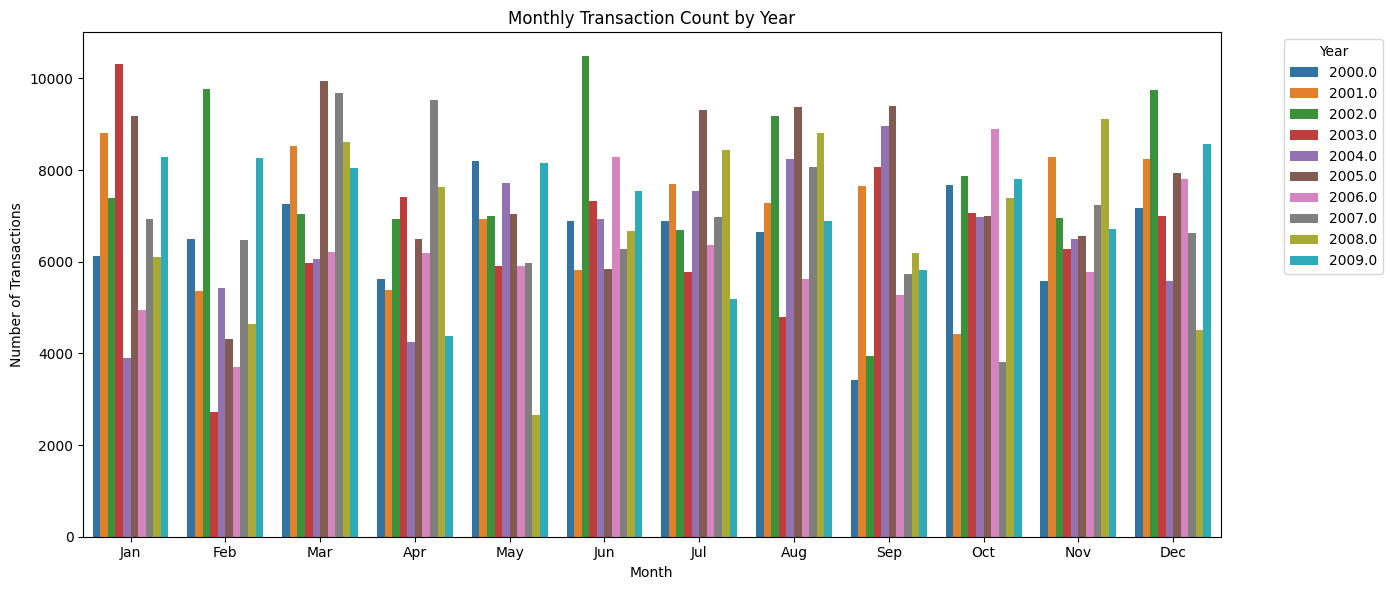

In [27]:
# Group by month and year
monthly_sales = sales_data.groupby(["month", "year"]).size().reset_index(name="transactions")

# Convert month number to name (ensure integer index)
monthly_sales["month_name"] = monthly_sales["month"].apply(lambda x: calendar.month_abbr[int(x)])
month_order = list(calendar.month_abbr)[1:]
monthly_sales["month_name"] = pd.Categorical(monthly_sales["month_name"], categories=month_order, ordered=True)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_sales,
    x="month_name",
    y="transactions",
    hue="year",
    palette="tab10"
)

plt.title("Monthly Transaction Count by Year")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

The grouped bar chart above presents monthly transaction volumes for each year from 2000 to 2009.

We can observe seasonal trends, such as

- **Seasonal Trends**: Certain months like **March, June, and August** consistently show higher transaction volumes across many years, suggesting potential seasonal demand peaks.
- **Year-over-Year Variation**: There is visible variation in transaction counts by year, with some years showing stronger overall performance certain months, example year **2000**  in **January**,  year **2002**  in **June**, etc.
- **End-of-Year Activity**: Unlike common retail trends, **December does not always peak**, indicating that this mini-mart may not be as affected by typical holiday sales patterns.
- **Overall Stability**: Despite fluctuations, transaction volumes appear relatively stable month-to-month, with no extreme outliers or sudden drops.


#### Step 3.1.2: Monthly Sales Distribution of Top 10 Selling Items

To better understand product-level sales trends, we identify the **top 10 most frequently sold items** and analyze how their transactions are distributed across months.

By visualizing this, the store owner can learn which items are in demand in specific months — useful for stocking and promotions planning.

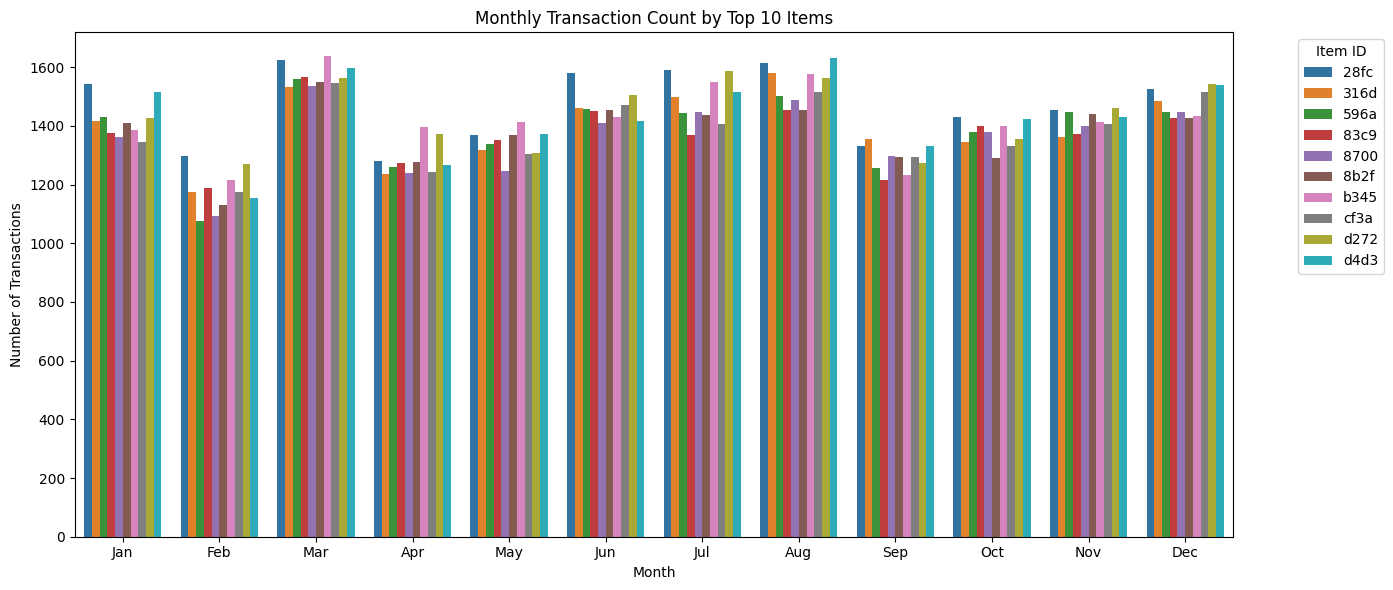

In [28]:
# Get top 10 items overall
top_10_items = sales_data["item id"].value_counts().head(10).index

#  Filter to only top 10 items
filtered_data = sales_data[sales_data["item id"].isin(top_10_items)]

# Group by item and month
monthly_top_items = (
    filtered_data.groupby(["month", "item id"])
    .size()
    .reset_index(name="transactions")
)

# Convert month number to name
monthly_top_items["month_name"] = monthly_top_items["month"].apply(lambda x: calendar.month_abbr[int(x)])
month_order = list(calendar.month_abbr)[1:]
monthly_top_items["month_name"] = pd.Categorical(monthly_top_items["month_name"], categories=month_order, ordered=True)

# Plot grouped bar chart for Top 10 Items
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_top_items,
    x="month_name",
    y="transactions",
    hue="item id",
    palette="tab10"
)

plt.title("Monthly Transaction Count by Top 10 Items")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.legend(title="Item ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

The grouped bar chart above illustrates how the top 10 selling items perform across each month of the year. Each color represents a unique item, allowing comparison of item-level sales trends over time.

We can observe the following

- **Consistent Demand**: Most top items show relatively steady performance across all months, indicating they are staple products with year-round demand.
- **Seasonal Spikes**: Items like `28fc`, `d4d3`, and `d272` show slight peaks in **March, July, and December**, suggesting potential alignment with promotional periods or seasonal preferences.
- **Balanced Competition**: No single item dominates all months, which may indicate a well-diversified product mix driving consistent customer engagement.

These insights can help the store optimize inventory planning, prioritize high-performing products for marketing campaigns, and detect periods where specific items should be restocked in larger quantities.


## Summary

Through thorough data cleaning and exploratory analysis, we have uncovered key trends from the Key&U mini-mart’s sales data spanning multiple years.

- **Transaction Trends**: We observed consistent monthly transaction patterns across years, with peaks typically in March, June, and August. This suggests seasonality or operational cycles that can inform stocking and staffing decisions.
- **Top-Selling Items**: The top 10 items show stable performance throughout the year, with some seasonal spikes. Products like `d4d3` and `d272` tend to perform better in the second half of the year.
- **Data Quality**: Missing and duplicate records were removed, and columns were cleaned for consistency. The `discounted %` field mostly contained zero values, suggesting limited promotional activity or a need for better discount tracking.
- **Visual Exploration**: We used grouped bar charts and FacetGrids to visualize trends by year and item. These visualizations highlight both high-level trends and product-specific behaviors.

Overall, the analysis provides actionable insights for optimizing inventory, promotions, and operational planning. Further exploration with pricing or customer data could unlock even deeper value.
